In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import warnings
import sympy as sy
import random
from tqdm.notebook import tqdm
InteractiveShell.ast_node_interactive = "all"
warnings.filterwarnings("ignore")

### Theory

Consider a system where:

\begin{equation}
h^t= f (h^{t-1},\theta)  
\end{equation}
\begin{equation}
\theta \text{: parameters shared across all time steps}
\end{equation}

That is, its state at time step t, is dependent only on a set a parameters and the previous state at t-1
<br>
<br>
Let the state of the system, h, also be depedent on an input at the respective time step, x:

\begin{equation}
h^t= f (h^{t-1},x^{t},\theta)  
\end{equation}

The state h now contains information about the entire past history of inputs, x.

Consider now a system that given the hidden state, h,produces an output o, for each time step. This output is passed to an activation function made to predict the target, y, at the respective time step.

\begin{equation}
o^t= g (h^{t},\theta')  
\end{equation}
\begin{equation}
\theta' \text{: a different set of parameters as $\theta$}
\end{equation}


We define now define $\theta$ and $\theta'$ as the weight matrices describing the relation between the input-to-hidden, hidden-to-hidden and hidden-to-output notes; $U$, $W$ and $V$:

\begin{equation}
z^t=  W^{T}h^{t-1} + U^{T}x^t +b 
\end{equation}

\begin{equation}
h^{t} = \phi(z^t)
\end{equation}

\begin{equation}
o^t = V^Th^{t} + c
\end{equation}

Where $b$ and $c$ are biases, $\phi$ is an activation function. <br><br>
**Note**: matrices $U$, $W$ and $V$ are not indexed by time. 

consider the following schematic to get a better understanding for a reccurent system
<img src="media/RNNFoldedandUnfolded.png" style="height: 300px;"/>
credits: fdeloche 

Then for each time step, we have a sequential total loss up to time step $\tau$, $L^\tau$, defined as the difference between our prediction and the target, at each output, upto the time step $\tau$
<br>
<br>
Consider the task of multi-class classification. 
<br>
<br>
Consequently, the output activation function is the normalized expontential function, a.k.a the _softmax function_

\begin{equation}
L = \sum_{t=1}^{\tau} l\big(o^{t}\big)
\text{: Total loss upto time step $\tau$}  
\end{equation}

\begin{equation}
\hat{y}^t_i = \frac{\exp(o_i^t)}{\sum_{j}\exp(o_j^t)}
\text{: Softmax activation function for multi-class classification}
\end{equation}

**NOTE** the softmax is a vector function, later when taking the derivative, in reality I am finding the Jacobian of it in its vector form, but here I denote one element of it, the $i^{th}$

\begin{equation}
l = - \sum_{m=0}^{M-1}y_{m}^{t} \log\Big(\hat{y}_{m}^{t}\Big)
\text{: M categorical cross entropy for predictions at time step $t$}
\end{equation}


The optimization process differs from standard back-propagation (like descirbed for a vanilla feedforward network). Usng the above assumptions, I will go through the derivation analogous optimization process for recurrent networks;

### Back propagation through time

Per example loss w.r.t to the output element $o_i$ at time $t$; $o_i^{t}$

\begin{equation}
\nabla_{o_{i}^{t}} L = \frac{\partial{L}}{\partial{l(o_i^t)}} \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}}
\end{equation}
Note that:
\begin{equation}
 \frac{\partial{L}}{\partial{l(o_i^t)}} = 1
\end{equation}
and that:
\begin{equation}
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}}
\end{equation}
is the derivative of the categorical cross-entropy
\begin{equation}
\boxed{
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = - \sum_{j} \frac{y_j^{t}}{\hat{y}_j^{t}}\frac{\partial{\hat{y}^{t}_j}}{\partial{o_i^{t}}} } - [1]
\end{equation}
The softmax functions is:
 \begin{equation}
 \hat{y}^t_i = \frac{\exp(o_i^t)}{\sum_{j}\exp(o_j^t)}
\end{equation}
Taking its derivative gives:
\begin{equation}
\boxed{
    \frac{\partial{\hat{y}^{t}_i}}{\partial{o_j^{t}}} = \hat{y}^{t}_{i} \Big( \delta_{ij}  -  \hat{y}^{t}_{j} \Big)
}- [2]
\end{equation}
_look at the different cases to see why this is true_ i.e. $i=j$ and $i \neq j$
<br><br>
Lets sub [2] into [1], and splitting into the cases where $i=j$ and $i \neq j $:

 \begin{equation}
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = - \sum_{j} \frac{y_j^{t}}{\hat{y}_j^{t}} \hat{y}^{t}_{j} \Big(\delta_{ij}  -  \hat{y}^{t}_{i} \Big)
\end{equation}

 \begin{equation}
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = - \sum_{j} y_j^{t} \Big(\delta_{ij}  -  \hat{y}^{t}_{i} \Big)
\end{equation}
 
Lets now split the sum up for the two cases;

\begin{equation}
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} =  \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} \Bigr|_{j=i} + \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} \Bigr|_{j \neq i}  =  -y^{t}_{i}(\delta_{ii} - \hat{y}_{i})^{t} - \sum_{j \neq i} y_j^{t} \Big(\delta_{ij}  -  \hat{y}^{t}_{i} \Big)
\end{equation} 
Simplfying down: 

\begin{equation}
 
 \frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} =  -y^{t}_{i}(1 - \hat{y}_{i})^{t} - \sum_{j \neq i} y_j^{t} \Big( 0 -\hat{y}^{t}_{i} \Big)
\end{equation} 

\begin{equation}
\frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = \sum_{j \neq i} y_j^{t} \hat{y}^{t}_{i}  -y^{t}_{i}(1 - \hat{y}_{i})^{t} 
\end{equation} 


\begin{equation}
\frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = \sum_{j \neq i} y_j^{t} \hat{y}^{t}_{i}+y^{t}_{i}\hat{y}_{i}^{t}  -y^{t}_{i}
\end{equation} 
Recall that $\sum_{j} y_j = 1$
\begin{equation}
\frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = \sum_{j \neq i} \Big( y_j^{t} +y^{t}_{i} \Big) \hat{y}^{t}_{i}  -y^{t}_{i}
\end{equation} 


\begin{equation}
\frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} = \sum_{j} \Big( y_j^{t} \Big) \hat{y}^{t}_{i}  -y^{t}_{i}
\end{equation} 


\begin{equation}
\boxed{
\frac{\partial{l(o_i^t)}}{\partial o_{i}^{t}} =  \hat{y}^{t}_{i}  -y^{t}_{i}
}
\end{equation} 

Next, lets calculate the gradient on the internel nodes $h^t$ from the end of the sequence $\tau$.
<br>
I am going to use vector notation here on out. I.e. $h_i^{t}$ becomes $h^t$ 

\begin{equation}
\nabla_{h^\tau} L = \Bigg( \frac{ \partial{o^{\tau}}}
{\partial{h^{\tau}}} \Bigg)^{T} \nabla_{o^\tau} L
\end{equation}

\begin{equation}
\nabla_{h^\tau} L = V \nabla_{o^\tau} L
\end{equation}
we iterate backwards through time. Note the dependency of $h^t$ on both $o^t$ and $h^{t+1}$


\begin{equation}
\nabla_{h^t} L = \Bigg( \frac{ \partial{h^{t+1}}}
{\partial{h^{t}}} \Bigg)^{T} \nabla_{h^{t+1}} L +
\Bigg( \frac{ \partial{o^{t}}}
{\partial{h^{t}}} \Bigg)^{T} \nabla_{o^{t}} L 
\end{equation}




The derivate of the hidden units  w.r.t their previous time step is:

\begin{equation}
 \frac{ \partial{h^{t+1}} }
{\partial{h^{t}} }  =  \frac{ \partial{h^{t+1}} }{ \partial{z^{t+1} } }
\frac{ \partial{z^{t+1} } } { \partial{h^{t}} }
\end{equation}
This leads to:

\begin{equation}
 \frac{ \partial{h^{t+1}} }
{\partial{h^{t}} }  =  diag\Bigg( \phi'\big(z^{t+1}\big) \Bigg) W^T
\end{equation}
**Note** diag: considering only the leading diagonal values and setting all others to 0. 
<br><br>
For RNNs , we want to use a saturating activation to avoid gradient explosions <br><br>
e.g. hyperbolic tagent. 

\begin{equation}
\nabla_{h^t} L = W  diag \Big( \phi'\big(z^{t+1}\big) \Big)   \nabla_{h^{t+1}} L +
V \nabla_{o^{t}} L 
\end{equation}


Lets specify the activation function (using the hyperpolic tagent)

\begin{equation}
\nabla_{h^t} L = W  diag \Big( 
     1 - \big(h^{t+1}\big)^2
    \Big)  \nabla_{h^{t+1}} L +
V \nabla_{o^{t}} L 
\end{equation}

Now for the gradients on the biases $b$ and $c$

\begin{equation}
\nabla_{c} L  = \sum_{t} \Bigg(
     \frac{\partial{o^t}}{\partial{c^t}} 
     \Bigg)^{T} \nabla_{o^t} L
\end{equation}
since $\frac{\partial{o^t}}{\partial{c^t}} = 1$

\begin{equation}
\nabla_{c} L  = \sum_{t} \nabla_{o^t} L
\end{equation}
Next:
\begin{equation}
\nabla_{b} L  = \sum_{t}  \Bigg(
     \frac{\partial{h^t}}{\partial{b^t}} 
     \Bigg)^{T}  \nabla_{h^t} L
\end{equation}
Since $b$ is dependent on h through the activation function $\phi$, we have: 

Next:
\begin{equation}
\nabla_{b} L  = \sum_{t}  diag \Bigg( \phi' \Big( z^t \Big) \Bigg) \nabla_{h^t} L
\end{equation}

The derivative w.r.t to $V$; the hidden-ouput matrix 

\begin{equation}
\nabla_{V} L  = \sum_{t} \sum_{i}  \Bigg(
    \frac{ \partial L}{ \partial o_{i}^t}
     \Bigg)^T \nabla_{V} O_i^{t}
\end{equation}
Leading to:
\begin{equation}
\boxed{
\nabla_{V} L  = \sum_{t} h^t \Big(\nabla_{o^t} L \Big)^T
}
\end{equation}

For the derivative w.r.t the weight matrices $W$ and $U$, we introduce dummy variables $W^t$ and $U^t$. These are copies of each other at each time step, summing these up will give us the total gradient. 


\begin{equation}
\nabla_{W} L  = \sum_{t} \sum_{i}  \Bigg(
    \frac{ \partial L}{ \partial h_{i}^t}
     \Bigg)^T \nabla_{W^t} h_i^{t}
\end{equation}
giving: 
\begin{equation}
\boxed{
\nabla_{W} L  = \sum_{t} h^{t-1} \Big(\nabla_{h^t} L \Big)^T  diag \Bigg( \phi ' \big(z^t \big) \Bigg)

}
\end{equation}
for the derivative of w.r.t $U$:

\begin{equation}
\nabla_{U} L  = \sum_{t} \sum_{i}  \Bigg(
    \frac{ \partial L}{ \partial h_{i}^t}
     \Bigg)^T \nabla_{U^t} h_i^{t}
\end{equation}
giving: 
\begin{equation}
\boxed{
\nabla_{U} L  = \sum_{t} x^{t} \Big( \nabla_{h^t} L \Big)^T 
     diag \Bigg( \phi ' \big(z^t \big) \Bigg)

}
\end{equation}


# Recurrent neural network implementation with backpropagation

In [1]:
class RNN:
    def __init__(self, input_dim, output_dim, hidden_dim=128):
        # network variables 
        self.idim = input_dim
        self.hdim = hidden_dim
        self.odim = output_dim
        # initialise weights 
        self.U = np.random.uniform(- np.sqrt(1./self.idim),
                                     np.sqrt(1./self.idim),
                                    (self.idim, self.hdim) )

        self.V = np.random.uniform( -np.sqrt(1./self.hdim),
                                     np.sqrt(1./self.hdim), 
                                    (self.hdim,self.odim))

        self.W = np.random.uniform( -np.sqrt(1./self.hdim),
                                     np.sqrt(1./self.hdim), 
                                    (self.hdim,self.hdim))

        self.b = np.zeros(self.hdim)
        self.c = np.zeros(self.odim)
    

    def softmax(self,x):
        '''
        Note that this is a numerically stable version of softmax.
        We substract the max value from all elements.
        Overflow of a single element, or underflow of all elements,  will render the output usless.
        subtracting max leaves only non-positive values ---> no overflow 
        at least one element = 0 ---> no vanishing denominator (underflow is some enteries is okay) 
         '''
        xt = np.exp(x-np.max(x))
        return xt / np.sum(xt)


    def forward(self,x):
        # Single example pass forward, all the way through the network
        T = len(x)
        # will stack as rows
        h = np.zeros((T,self.hdim))
        o = np.zeros((T,self.odim))
        for t in range(T):
            h[t] = self.U.T @ x[t] + self.b
            if t > 1:
                h[t] += self.W @ h[t-1] + self.b
            h[t] = np.tanh(h[t])
            o[t] = self.softmax( self.V.T @ h[t] + self.c)
        return (o,h)



    def backward(self, x, y, clip=None):
        T = len(x)
        o,h = self.forward(x)
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        dLdb = np.zeros(self.b.shape)
        dLdc = np.zeros(self.c.shape)
        # dL/do
        delta_o = o
        # Notice, only evaluting at last output of network, yHat - y 
        delta_o[ np.arange(T), y ] -= float(y) 
        # dL/dh
        delta_h = np.zeros((T, self.hdim))
        for t in reversed(range(T)):

            # collect errors on hidden states
            delta_h[t] = self.V @ delta_o[T-1,:]
            if t < T-1:
                # collect errors on hidden states due to W
                delta_h[t] = ( self.W @ np.diag(1-h[t+1]**2) ) @ delta_h[t+1]
        for t in range(T):
            # error on ouput bias
            dLdc += delta_o[T-1,:]
            # error on hidden bias 
            dLdb += (1-h[t]**2) * delta_h[t,:]
            # error on hidden-output matrix
            ot = delta_o[T-1,:][...,np.newaxis]
            ht = h[t,:][...,np.newaxis]
            dht = delta_h[t,:][...,np.newaxis]

            dLdV += ht @ ot.T 
            # error on hidden-hidden W
            if t > 0 :
                h_t = h[t-1,:][...,np.newaxis]
                dLdW += ( h_t @ dht.T )@np.diag(1-h[t]**2)
            xt = x[t][...,np.newaxis]
            dLdU += xt @ dht.T @ np.diag(1-h[t]**2)

        if clip is not None:
            dLdb = np.clip(dLdb, -clip, clip)
            dLdc = np.clip(dLdc, -clip, clip)
            dLdV = np.clip(dLdV, -clip, clip)
            dLdW = np.clip(dLdW, -clip, clip)
            dLdU = np.clip(dLdU, -clip, clip)
        return (dLdU, dLdV, dLdW, dLdb, dLdc)


    def step(self,x,y,lr=0.0001):
        dLdU, dLdV, dLdW, dLdb, dLdc = self.backward(x,y)
        self.U -= lr * dLdU
        self.V -= lr * dLdV
        self.W -= lr * dLdW 
        self.b -= lr * dLdb 
        self.c -= lr * dLdc 
    

    def Loss(self, x,y):
        o,h = self.forward(x)      
        yHat= o[len(x)-1, :]
        y_1h = [0.0]*len(yHat)
        y_1h[int(y)] = 1.0
        LOSS = self.categorical_cross_entropy_loss(yHat, y_1h)
        return LOSS


    def categorical_cross_entropy_loss(self, yHats, ys):
        loss = 0.0
        for pred,true in zip(yHats, ys):
            loss += -1.0*(true * np.log(pred) + (1.0-true) * np.log(1.0 - pred))
        return loss

# Modelling synthetic time series data

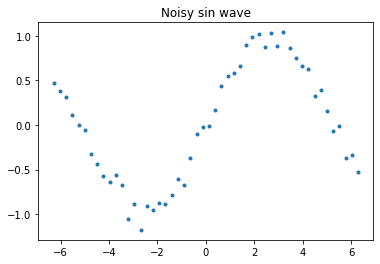

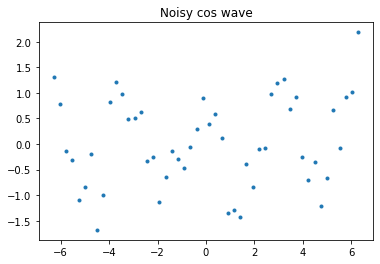

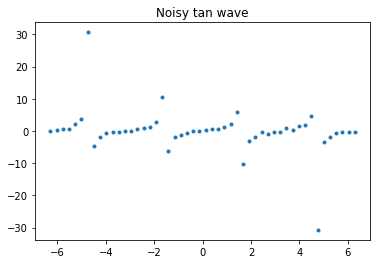

In [3]:
X = np.linspace(-2*np.pi, 2*np.pi, 50)


def noisy_sin_wave(x):
    return np.sin(x*0.6) + np.random.normal(loc=0, scale=0.1)


def noisy_cos_wave(x):
    return np.cos(x*2) + np.random.normal(loc=0, scale=0.5)


def noisy_tan_wave(x):
    return np.tan(x) + np.random.normal(loc=0, scale=0.3)


def plot_noisy_func(func, domain,title):
    fig, ax = plt.subplots(1,1)
    ax.set_title(title)
    ax.plot(domain,np.vectorize(func)(domain), ".")


def create_sample_seq(func1, domain, label):
    X = np.array([np.vectorize(func1)(domain)])
    Y = np.array([label]*X.shape[0])
    X = X.T
    return X,Y

plot_noisy_func(noisy_sin_wave, X, "Noisy sin wave")
plot_noisy_func(noisy_cos_wave, X, "Noisy cos wave")
plot_noisy_func(noisy_tan_wave, X, "Noisy tan wave")

## synthetic data generation 

In [4]:
var_sin, var_cos, var_tan = sy.symbols("sin+e, cos+e, tan+e")
sy.Matrix([var_sin])

Matrix([[sin+e]])

In [5]:
sy.Matrix([var_cos])

Matrix([[cos+e]])

In [8]:
sy.Matrix([var_tan])

Matrix([[tan+e]])

In [6]:
def data_loader(domain, sample_size=30):
    X0 = [ create_sample_seq(noisy_sin_wave, domain, 0) for _ in range(sample_size)]
    X1 = [ create_sample_seq(noisy_cos_wave, domain, 1) for _ in range(sample_size)]
    X2 =[ create_sample_seq(noisy_tan_wave, domain, 2) for _ in range(sample_size)]
    X = [*X0, *X1 , *X2]
    random.shuffle(X)
    return X
data  = data_loader( X)

# Training the model

In [7]:
loss_history = []
MAX_EPOCHS = 1000
LR=0.001

model = RNN(input_dim=1, output_dim=3, hidden_dim=128)
domain = np.linspace(-2*np.pi, 2*np.pi, 50)
X = data_loader(domain)

for epoch in tqdm(range(MAX_EPOCHS)):
    loss = 0
    for pair in X:
        x,y  = pair        
        loss += model.Loss(x, y)
        model.step(x, y, lr=LR)
        loss = loss / len(x)
    print(f"Epoch {epoch} Loss {loss}")
    loss_history.append(loss)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 Loss 0.002357071238514046
Epoch 1 Loss 8.649001121713586e-05
Epoch 2 Loss 2.25482266338647e-06
Epoch 3 Loss 1.7344027762893394e-08
Epoch 4 Loss 1.0233951763311463e-08
Epoch 5 Loss nan
Epoch 6 Loss nan
Epoch 7 Loss nan
Epoch 8 Loss nan
Epoch 9 Loss nan
Epoch 10 Loss nan
Epoch 11 Loss nan
Epoch 12 Loss nan
Epoch 13 Loss 1.0154492212615812e-05
Epoch 14 Loss 6.821388441667739e-06
Epoch 15 Loss 1.2344867615253419e-05
Epoch 16 Loss 1.0570144237627175e-05
Epoch 17 Loss 2.0009482299280175e-05
Epoch 18 Loss 2.9586066279775306e-05
Epoch 19 Loss 3.5491327717903056e-05
Epoch 20 Loss 3.8584947598017084e-05
Epoch 21 Loss 0.23627207685864687
Epoch 22 Loss 0.47319833628032015
Epoch 23 Loss 0.48594873224556473
Epoch 24 Loss 0.506740564910557
Epoch 25 Loss 0.4993856296598219
Epoch 26 Loss 0.49621634100710416
Epoch 27 Loss 0.510776775004078
Epoch 28 Loss 0.7944902378936669
Epoch 29 Loss 0.8212609198523448
Epoch 30 Loss 0.03428152028376385
Epoch 31 Loss 0.038818818854145565
Epoch 32 Loss 0.0422222

KeyboardInterrupt: 